<a href="https://colab.research.google.com/github/Pranav-DarkMarge/Machine-Learning/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction to Machine Learning Assignment #3    

Name: Pranav Mogli

Student ID: 801420875

GitHub: https://github.com/Pranav-DarkMarge/Machine-Learning.git

In [37]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay,f1_score
import matplotlib.pyplot as plt
import numpy as np


Problem 1

(i). Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign).

In [38]:
# Step 2: Load the dataset
breast = load_breast_cancer()
X = breast.data
Y = breast.target

In [39]:
# Step 3: Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [40]:
# Step 4: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_scaled, Y_train)

LogisticRegression(max_iter=10000)

In [42]:
Y_pred = log_reg.predict(X_test_scaled)

In [43]:
accuracy_lr = accuracy_score(Y_test, Y_pred)
precision_lr = precision_score(Y_test, Y_pred)
recall_lr = recall_score(Y_test, Y_pred)
training_score_lr = log_reg.score(X_train_scaled, Y_train)
f1_lr = f1_score(Y_test, Y_pred)


# Print the results
print(f"Accuracy: {accuracy_lr * 100:.2f}%")
print(f"Precision: {precision_lr * 100:.2f}%")
print(f"Recall: {recall_lr * 100:.2f}%")
print(f"Training Score: {training_score_lr * 100:.2f}%")

Accuracy: 97.37%
Precision: 97.22%
Recall: 98.59%
Training Score: 98.68%


In [44]:
logistic_regression = [accuracy_lr,precision_lr,recall_lr,f1_lr]

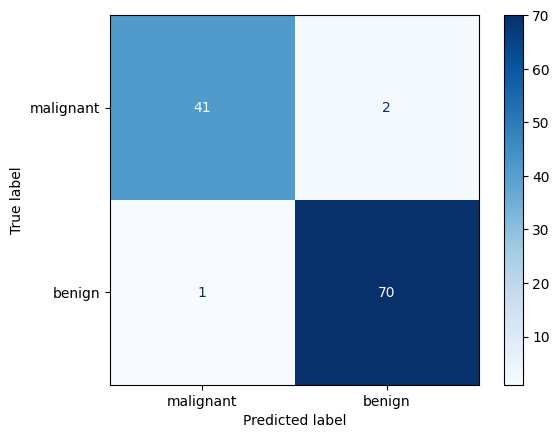

In [45]:
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=breast.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Problem 1

(ii). Adding Weight Penalty

In [46]:
C = [30,3,.3,.003]

for c in C:
    log_reg = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    log_reg.fit(X_train_scaled, Y_train)
    print('C:',c)
        # Step 2: Predict on the test data
    Y_pred = log_reg.predict(X_test_scaled)
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    training_score = log_reg.score(X_train_scaled, Y_train)
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"Training Score: {training_score}")
    print('')

C: 30
Accuracy: 0.9385964912280702
Precision: 0.9848484848484849
Recall: 0.9154929577464789
Training Score: 0.9956043956043956

C: 3
Accuracy: 0.9736842105263158
Precision: 0.9857142857142858
Recall: 0.971830985915493
Training Score: 0.989010989010989

C: 0.3
Accuracy: 0.9736842105263158
Precision: 0.9857142857142858
Recall: 0.971830985915493
Training Score: 0.9802197802197802

C: 0.003
Accuracy: 0.37719298245614036
Precision: 0.0
Recall: 0.0
Training Score: 0.37142857142857144



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Problem 2

(i). Use the cancer dataset to build a naive Bayesian model to classify the type of cancer (Malignant vs. benign).

In [47]:
from sklearn.naive_bayes import GaussianNB


In [48]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, Y_train)
nb_classifier.score(X_train_scaled, Y_train)

0.9362637362637363

In [49]:
Y_pred_nb = nb_classifier.predict(X_test_scaled)

In [50]:
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
precision_nb = precision_score(Y_test, Y_pred_nb)
recall_nb = recall_score(Y_test, Y_pred_nb)
f1_nb = f1_score(Y_test, Y_pred_nb)


In [51]:
print(f"Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%")
print(f"Naive Bayes Precision: {precision_nb * 100:.2f}%")
print(f"Naive Bayes Recall: {recall_nb * 100:.2f}%")
print(f"Naive Bayes F1 Score: {f1_nb* 100:.2f}%")

Naive Bayes Accuracy: 96.49%
Naive Bayes Precision: 95.89%
Naive Bayes Recall: 98.59%
Naive Bayes F1 Score: 97.22%


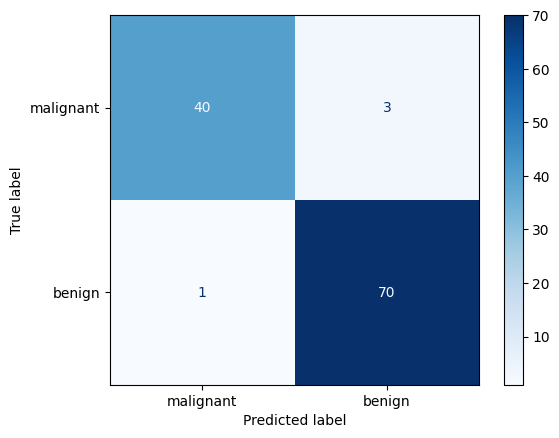

In [52]:
cm = confusion_matrix(Y_test, Y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=breast.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Problem 2

(ii). Plot your classification accuracy, precision, recall, and F1 score. Explain and elaborate on your results, comparing your results against the logistic regression classifier you did in Problem 1.

In [53]:
naive_bayes = [accuracy_nb,precision_nb,recall_nb,f1_nb]

In [54]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
naive_bayes = [accuracy_nb, precision_nb, recall_nb, f1_nb]
logistic_regression = [accuracy_lr, precision_lr, recall_lr, f1_lr]

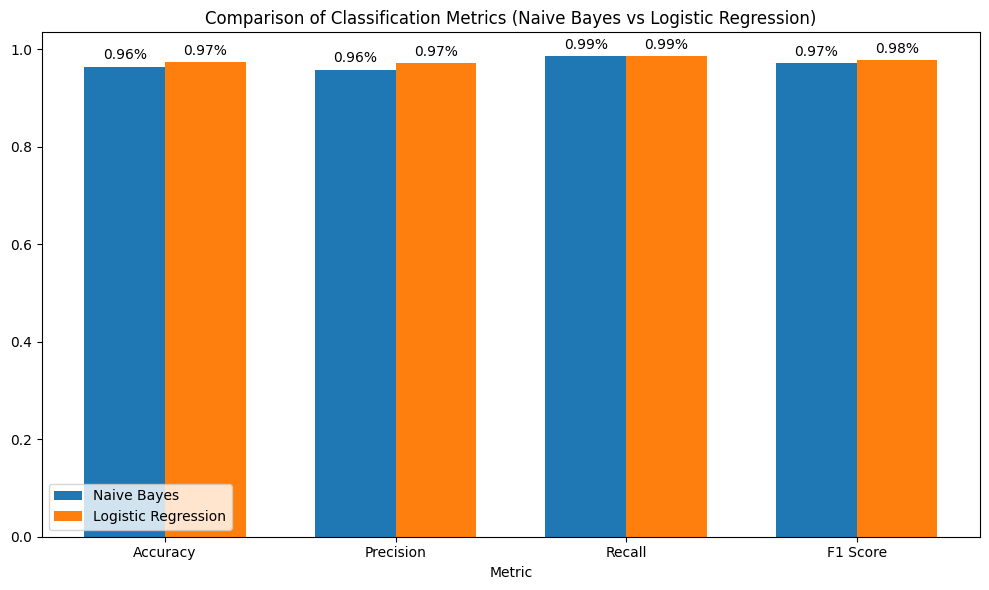

In [55]:

x = np.arange(len(labels))  # The label locations
width = 0.35  # The width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for Naive Bayes and Logistic Regression
rects1 = ax.bar(x - width/2, naive_bayes, width, label='Naive Bayes')
rects2 = ax.bar(x + width/2, logistic_regression, width, label='Logistic Regression')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metric')
ax.set_title('Comparison of Classification Metrics (Naive Bayes vs Logistic Regression)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add values on top of the bars
def add_values(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}%',  # Format to show percentage
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_values(rects1)
add_values(rects2)

# Show the plot
plt.tight_layout()
plt.show()

Problem 3

(i). Use the cancer dataset to build an SVM classifier to classify the type of cancer (Malignant vs. benign).

In [56]:
from sklearn.svm import SVC

In [57]:
svm_classifier = SVC(kernel='linear',C=1.0)
svm_classifier.fit(X_train_scaled, Y_train)

SVC(kernel='linear')

In [58]:
Y_pred_svm = svm_classifier.predict(X_test_scaled)

In [59]:
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
precision_svm = precision_score(Y_test, Y_pred_svm)
recall_svm = recall_score(Y_test, Y_pred_svm)
f1_svm = f1_score(Y_test, Y_pred_svm)

In [60]:
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")
print(f"SVM Precision: {precision_svm * 100:.2f}%")
print(f"SVM Recall: {recall_svm * 100:.2f}%")
print(f"SVM F1 Score: {f1_svm* 100:.2f}%")

SVM Accuracy: 95.61%
SVM Precision: 97.14%
SVM Recall: 95.77%
SVM F1 Score: 96.45%


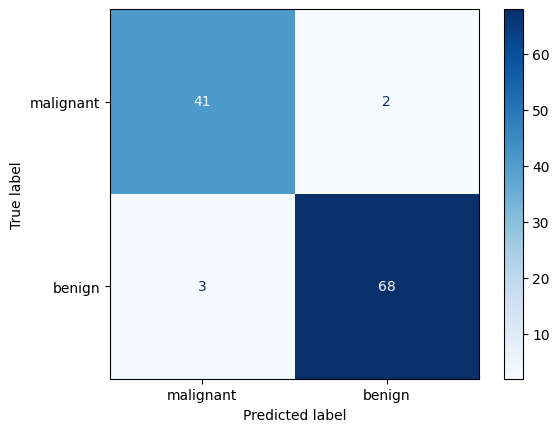

In [61]:
cm = confusion_matrix(Y_test, Y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=breast.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Problem 3

(ii).Plot your classification accuracy, precision, recall, and F1 score. Explain and elaborate on your results, comparing your results against the  classifiers you did in Problem 1 and 2.

In [62]:
svm = [accuracy_svm,precision_svm,recall_svm,f1_svm]

In [63]:
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
naive_bayes = [accuracy_nb, precision_nb, recall_nb, f1_nb]
logistic_regression = [accuracy_lr, precision_lr, recall_lr, f1_lr]
svm = [accuracy_svm,precision_svm,recall_svm,f1_svm]

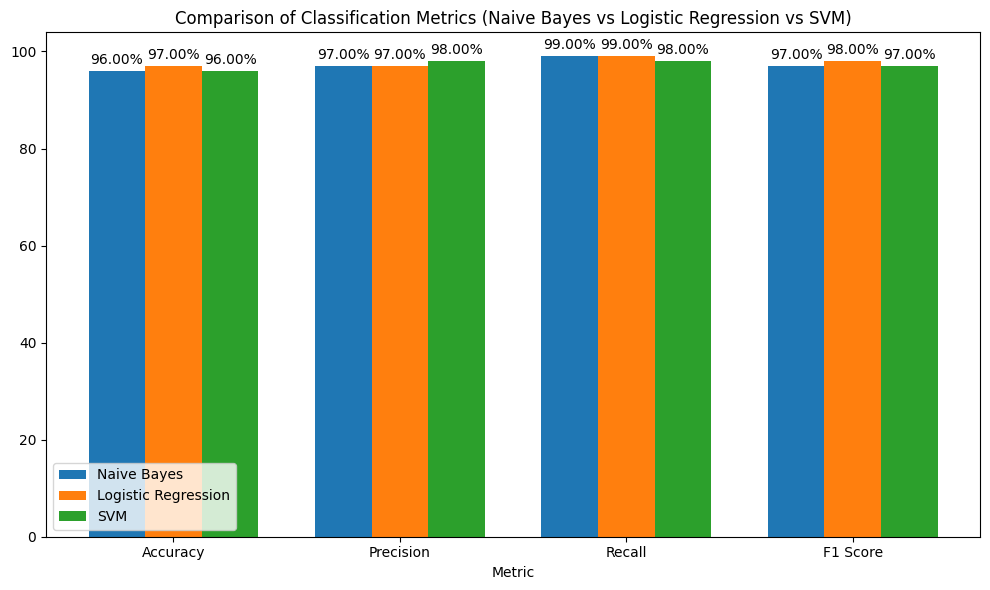

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Example data: Replace these values with your actual metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
naive_bayes = [96, 97, 99, 97]  # Example values for Naive Bayes
logistic_regression = [97, 97, 99, 98]  # Example values for Logistic Regression
svm = [96, 98, 98, 97]  # Example values for SVM

x = np.arange(len(labels))  # The label locations
width = 0.25  # Adjust width for 3 bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for Naive Bayes, Logistic Regression, and SVM
rects1 = ax.bar(x - width, naive_bayes, width, label='Naive Bayes')
rects2 = ax.bar(x, logistic_regression, width, label='Logistic Regression')
rects3 = ax.bar(x + width, svm, width, label='SVM')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metric')
ax.set_title('Comparison of Classification Metrics (Naive Bayes vs Logistic Regression vs SVM)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add values on top of the bars
def add_values(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}%',  # Format to show percentage
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_values(rects1)
add_values(rects2)
add_values(rects3)

# Show the plot
plt.tight_layout()
plt.show()


Problem 4

 Use the PCA feature extraction for your training.

In [65]:
from sklearn.decomposition import PCA

In [66]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.fit_transform(X)
X_scaled.shape


(569, 30)

In [68]:
def pca(percentage):
  pca = PCA(percentage)
  pca.fit(X_scaled)
  X_pca = pca.transform(X_scaled)
  return pca.n_components

In [70]:
components_lists = [(ratio, pca(ratio / 100)) for ratio in range(80, 100, 1)]
for ratio, components in components_lists:
    print(f'For the explained variance ratio {ratio}, {components} components retain the information.')

For the explained variance ratio 80, 0.8 components retain the information.
For the explained variance ratio 81, 0.81 components retain the information.
For the explained variance ratio 82, 0.82 components retain the information.
For the explained variance ratio 83, 0.83 components retain the information.
For the explained variance ratio 84, 0.84 components retain the information.
For the explained variance ratio 85, 0.85 components retain the information.
For the explained variance ratio 86, 0.86 components retain the information.
For the explained variance ratio 87, 0.87 components retain the information.
For the explained variance ratio 88, 0.88 components retain the information.
For the explained variance ratio 89, 0.89 components retain the information.
For the explained variance ratio 90, 0.9 components retain the information.
For the explained variance ratio 91, 0.91 components retain the information.
For the explained variance ratio 92, 0.92 components retain the information.
F

In [72]:
pca = PCA()
pca.fit(X_scaled)
maxpca = pca.transform(X_scaled)

<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

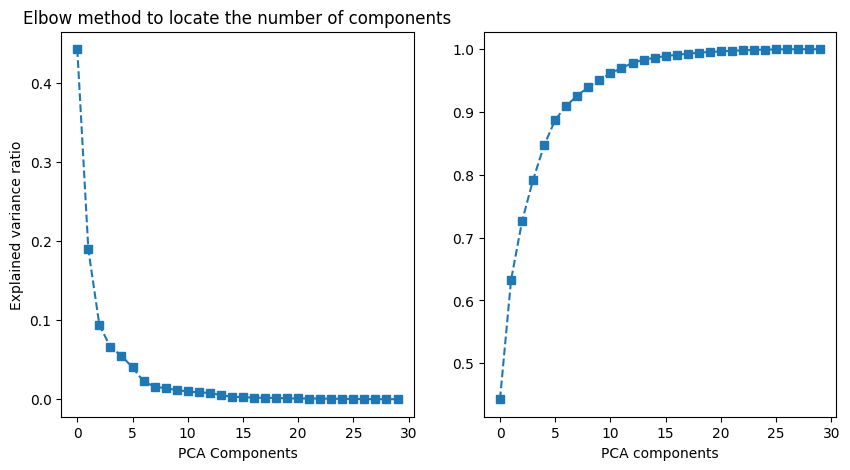

In [73]:
Explained_variance_ratio=pca.explained_variance_ratio_
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(Explained_variance_ratio,'s--')
plt.xlabel('PCA Components')
plt.ylabel('Explained variance ratio')
plt.title('Elbow method to locate the number of components')

import itertools
curve=list(itertools.accumulate(Explained_variance_ratio))
plt.subplot(1,2,2)
plt.plot(curve,'s--')
plt.xlabel('PCA components')
plt.ylabel

In [75]:
pca_optimal = PCA(n_components = 6)

In [77]:
pca_optimal.fit(X_scaled)
PCA_principal_Components = pca_optimal.transform(X_scaled)
columns = ['pc' + str(i) for i in range(1, 7)]
principal_DataFrame = pd.DataFrame(data=PCA_principal_Components, columns=columns)
principal_DataFrame.head()

,pc1,pc2,pc3,pc4,pc5,pc6
0,9.192837,1.948583,-1.123166,-3.633731,1.195110,1.411424
1,2.387802,-3.768172,-0.529293,-1.118264,-0.621775,0.028656
2,5.733896,-1.075174,-0.551748,-0.912083,0.177086,0.541452
3,7.122953,10.275589,-3.232790,-0.152547,2.960878,3.053422
4,3.935302,-1.948072,1.389767,-2.940639,-0.546747,-1.226495


In [78]:
principal_DataFrame['Target'] = breast.target
principal_DataFrame.shape

(569, 7)

In [79]:
principal_DataFrame.head()

,pc1,pc2,pc3,pc4,pc5,pc6,Target
0,9.192837,1.948583,-1.123166,-3.633731,1.195110,1.411424,0
1,2.387802,-3.768172,-0.529293,-1.118264,-0.621775,0.028656,0
2,5.733896,-1.075174,-0.551748,-0.912083,0.177086,0.541452,0
3,7.122953,10.275589,-3.232790,-0.152547,2.960878,3.053422,0
4,3.935302,-1.948072,1.389767,-2.940639,-0.546747,-1.226495,0


In [84]:
X_principal_components = principal_DataFrame.iloc[:,:-1]
Y_principal_components = principal_DataFrame.iloc[:, -1]

In [86]:
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X_principal_components,
                                                   Y_principal_components,
                                                   train_size = 0.8,
                                                   test_size = 0.20,
                                                   random_state = 100)
X_train_set.shape, X_test_set.shape, y_train_set.shape, y_test_set.shape

((455, 6), (114, 6), (455,), (114,))

In [87]:
principalComponents_Logistic_Model = LogisticRegression()
principalComponents_Logistic_Model.fit(X_train_set, y_train_set)
principalComponents_Logistic_Model.score(X_train_set, y_train_set)
Y_prediction = principalComponents_Logistic_Model.predict(X_test_set)
print(f"Accuracy: {accuracy_score(y_test_set, Y_prediction) * 100:.2f}%")
print(f"Precision: {precision_score(y_test_set, Y_prediction) * 100:.2f}%")
print(f"Recall: {recall_score(y_test_set, Y_prediction) * 100:.2f}%")
print(f"F1 Score: {f1_score(y_test_set, Y_prediction) * 100:.2f}%")

Accuracy: 95.61%
Precision: 95.45%
Recall: 96.92%
F1 Score: 96.18%


In [92]:
principal_NaiveBayesian_Model = GaussianNB()
principal_NaiveBayesian_Model.fit(X_train_set, y_train_set)
principal_NaiveBayesian_Model.score(X_train_set, y_train_set)
y_predicted = principal_NaiveBayesian_Model.predict(X_test_set)
print("Accuracy Score: ", accuracy_score(y_test_set, y_predicted),
      "\nPrecision Score: ", precision_score(y_test_set, y_predicted),
      "\nRecall Score: ", recall_score(y_test_set, y_predicted),
      "\nF1 Score: ", f1_score(y_test_set, y_predicted))

Accuracy Score:  0.8596491228070176 
Precision Score:  0.855072463768116 
Recall Score:  0.9076923076923077 
F1 Score:  0.8805970149253731


In [96]:
for i in range(6, 30, 2):
  pca_optimal = PCA(n_components=i)
  pca_optimal.fit(X_scaled)
  PCA_principal_Components = pca_optimal.transform(X_scaled)
  principal_DataFrame = pd.DataFrame(PCA_principal_Components, columns=[f'pc{j}' for j in range(1, i+1)])
  principal_DataFrame['Target'] = Y
  X_principal = principal_DataFrame.drop(columns=['Target'])
  y_principal = principal_DataFrame['Target']

  X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X_principal,
                                                    y_principal,
                                                    train_size = 0.8,
                                                    test_size = 0.20,
                                                    random_state = 100)
  principalComponents_Logistic_Model = LogisticRegression()
  principalComponents_Logistic_Model.fit(X_train_set, y_train_set)
  principalComponents_Logistic_Model.score(X_train_set, y_train_set)
  y_predicted = principalComponents_Logistic_Model.predict(X_test_set)
  print("\nK: ", i)
  print("Maximum ratio: ", np.cumsum(pca_optimal.explained_variance_ratio_)[-1])
  print("Accuracy Score: ", accuracy_score(y_test_set, y_predicted),
        "\nPrecision Score: ", precision_score(y_test_set, y_predicted),
        "\nRecall Score: ", recall_score(y_test_set, y_predicted),
        "\nF1 Score: ", f1_score(y_test_set, y_predicted))


K:  6
Maximum ratio:  0.887587963566906
Accuracy Score:  0.956140350877193 
Precision Score:  0.9545454545454546 
Recall Score:  0.9692307692307692 
F1 Score:  0.9618320610687023

K:  8
Maximum ratio:  0.9259825386969444
Accuracy Score:  0.9649122807017544 
Precision Score:  0.9552238805970149 
Recall Score:  0.9846153846153847 
F1 Score:  0.9696969696969697

K:  10
Maximum ratio:  0.951568814336667
Accuracy Score:  0.9649122807017544 
Precision Score:  0.9420289855072463 
Recall Score:  1.0 
F1 Score:  0.9701492537313433

K:  12
Maximum ratio:  0.9700713832200261
Accuracy Score:  0.9649122807017544 
Precision Score:  0.9420289855072463 
Recall Score:  1.0 
F1 Score:  0.9701492537313433

K:  14
Maximum ratio:  0.9833502905469197
Accuracy Score:  0.9736842105263158 
Precision Score:  0.9558823529411765 
Recall Score:  1.0 
F1 Score:  0.9774436090225563

K:  16
Maximum ratio:  0.9891502160796994
Accuracy Score:  0.9736842105263158 
Precision Score:  0.9558823529411765 
Recall Score:  1.